In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import joblib

df=pd.read_csv('MRec.csv')
data=pd.read_csv('MRec2.csv')
df.head()

,Age,Gender,Mood,Genre
0,55,F,Happy,Rock
1,55,F,Gloomy,Blues
2,55,F,Stressed,Rock
3,55,F,Relaxing,Instrumental
4,55,F,Energetic,Hiphop


In [177]:
df.tail()

,Age,Gender,Mood,Genre
605,18,F,Happy,Pop
606,18,F,Gloomy,Indie/Acoustic
607,18,F,Stressed,Instrumental
608,18,F,Relaxing,Country
609,18,F,Energetic,Rock


In [178]:
#Mean, std, and quartiles of dataset
data.describe()

,Age
count,154.000000
mean,27.064935
std,8.047795
min,17.000000
25%,21.000000
50%,24.000000
75%,32.000000
max,55.000000


In [179]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
Age       0
Gender    0
Mood      0
Genre     0
dtype: int64


In [180]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Age : [55 49 47 45 43 42 39 37 36 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20
 19 18]
Gender : ['F' 'M']
Mood : ['Happy' 'Gloomy' 'Stressed' 'Relaxing' 'Energetic']
Genre : ['Rock' 'Blues' 'Instrumental' 'Hiphop' 'Pop' 'Indie/Acoustic' 'Country'
 'EDM']


In [181]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(610, 4)


In [182]:
#Replacing categorical data with integer values

df['Gender'].replace(['M','F'],[0,1], inplace=True)
df['Mood'].replace(['Happy','Gloomy','Stressed','Relaxing','Energetic'],[1,2,3,4,5], inplace=True)

#Replace null values with NaN
df['Age'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Age'])
df['Gender'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Gender'])
df['Mood'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Mood'])

df.head(7)


,Age,Gender,Mood,Genre
0,55,1,1,Rock
1,55,1,2,Blues
2,55,1,3,Rock
3,55,1,4,Instrumental
4,55,1,5,Hiphop
5,49,0,1,Rock
6,49,0,2,Pop


In [183]:
#Replacing NaN instances with mean values
columns=df[['Age','Gender']]
for col in columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head(7)

,Age,Gender,Mood,Genre
0,55,1,1,Rock
1,55,1,2,Blues
2,55,1,3,Rock
3,55,1,4,Instrumental
4,55,1,5,Hiphop
5,49,0,1,Rock
6,49,0,2,Pop


In [184]:
#Checking for null values again
df.isnull().sum()

Age       0
Gender    0
Mood      0
Genre     0
dtype: int64

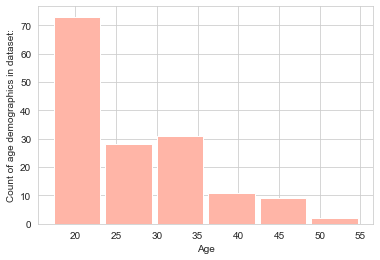

In [185]:
#Histogram of age
plt.hist(data['Age'], bins=6, rwidth=0.9, color="#ffb5a7")
plt.xlabel("Age")
plt.ylabel("Count of age demographics in dataset:")

plt.show()

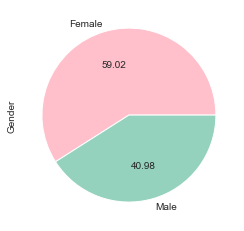

In [186]:
#Distribution of gender by pie-chart
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f", labels= {"Male","Female"},colors = ['pink', '#94d2bd'])
plt.show()

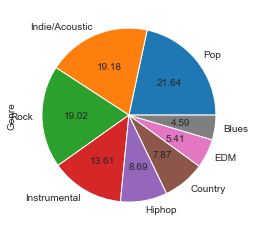

In [187]:
#Distribution of genre by pie-chart
df['Genre'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [188]:
a = pd.pivot_table(df, index=['Age'], columns=['Genre'], aggfunc='count')
a

Gender                                                              \
Genre  Blues Country  EDM Hiphop Indie/Acoustic Instrumental   Pop  Rock   
Age                                                                        
18       NaN     1.0  NaN    1.0            1.0          2.0   3.0   2.0   
19       NaN     2.0  3.0    6.0            3.0          NaN  12.0   9.0   
20       1.0     6.0  2.0    3.0            5.0          5.0   9.0  14.0   
21       2.0     2.0  6.0    5.0           18.0          9.0  25.0  13.0   
22       5.0     6.0  4.0    6.0           11.0         11.0   9.0   8.0   
23       4.0     3.0  4.0    7.0           12.0         13.0  11.0   6.0   
24       1.0     3.0  1.0    6.0           11.0          6.0   9.0   8.0   
25       NaN     2.0  NaN    2.0            6.0          2.0   7.0   1.0   
26       2.0     3.0  2.0    NaN            4.0          NaN   3.0   1.0   
27       1.0     1.0  2.0    NaN            1.0          1.0   1.0   3.0   
28       NaN     NaN  NaN    NaN            5.0          1.0   1.0   3.0   
29       4.0     3.0  1.0    2.0            NaN          5.0   3.0   2.0   
30       NaN     2.0  3.0    NaN            1.0          2.0   8.0   4.0   
31       1.0     2.0  1.0    3.0            5.0          2.0   NaN   1.0   
32       1.0     3.0  NaN    NaN            NaN          3.0   1.0   7.0   
33       NaN     2.0  NaN    3.0            2.0          8.0   8.0   7.0   
34       NaN     2.0  2.0    NaN            2.0          NaN   1.0   3.0   
36       NaN     NaN  NaN    NaN            2.0          NaN   2.0   1.0   
37       2.0     NaN  1.0    2.0            6.0          5.0   6.0   3.0   
39       1.0     NaN  1.0    4.0            3.0          2.0   NaN   4.0   
42       NaN     NaN  NaN    NaN            4.0          2.0   3.0   1.0   
43       NaN     4.0  NaN    NaN            4.0          1.0   NaN   1.0   
45       1.0     1.0  NaN    1.0            7.0          1.0   6.0   3.0   
47       1.0     NaN  NaN    1.0            4.0          NaN   2.0   7.0   
49       NaN     NaN  NaN    NaN            NaN          1.0   2.0   2.0   
55       1.0     NaN  NaN    1.0            NaN          1.0   NaN   2.0   

       Mood                                                              
Genre Blues Country  EDM Hiphop Indie/Acoustic Instrumental   Pop  Rock  
Age                                                                      
18      NaN     1.0  NaN    1.0            1.0          2.0   3.0   2.0  
19      NaN     2.0  3.0    6.0            3.0          NaN  12.0   9.0  
20      1.0     6.0  2.0    3.0            5.0          5.0   9.0  14.0  
21      2.0     2.0  6.0    5.0           18.0          9.0  25.0  13.0  
22      5.0     6.0  4.0    6.0           11.0         11.0   9.0   8.0  
23      4.0     3.0  4.0    7.0           12.0         13.0  11.0   6.0  
24      1.0     3.0  1.0    6.0           11.0          6.0   9.0   8.0  
25      NaN     2.0  NaN    2.0            6.0          2.0   7.0   1.0  
26      2.0     3.0  2.0    NaN            4.0          NaN   3.0   1.0  
27      1.0     1.0  2.0    NaN            1.0          1.0   1.0   3.0  
28      NaN     NaN  NaN    NaN            5.0          1.0   1.0   3.0  
29      4.0     3.0  1.0    2.0            NaN          5.0   3.0   2.0  
30      NaN     2.0  3.0    NaN            1.0          2.0   8.0   4.0  
31      1.0     2.0  1.0    3.0            5.0          2.0   NaN   1.0  
32      1.0     3.0  NaN    NaN            NaN          3.0   1.0   7.0  
33      NaN     2.0  NaN    3.0            2.0          8.0   8.0   7.0  
34      NaN     2.0  2.0    NaN            2.0          NaN   1.0   3.0  
36      NaN     NaN  NaN    NaN            2.0          NaN   2.0   1.0  
37      2.0     NaN  1.0    2.0            6.0          5.0   6.0   3.0  
39      1.0     NaN  1.0    4.0            3.0          2.0   NaN   4.0  
42      NaN     NaN  NaN    NaN            4.0          2.0   3.0   1.0  
43      NaN     4.0  NaN 

(array([27., 15., 46.,  0., 24., 11.,  0.,  6.,  6., 19.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

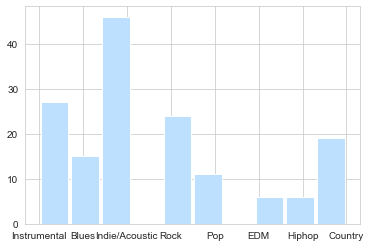

In [189]:
plt.hist(data['Gloomy'],color = "#bde0fe", rwidth=0.9)

<AxesSubplot:xlabel='Age', ylabel='Genre'>

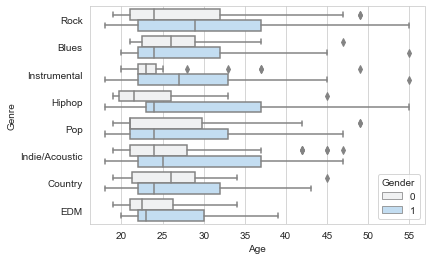

In [190]:
#Boxplot between Age and Genre, coloured by Gender
sns.boxplot(x='Age',y='Genre',hue='Gender',color = '#bbdef9',data=df)

<AxesSubplot:xlabel='Genre', ylabel='Mood'>

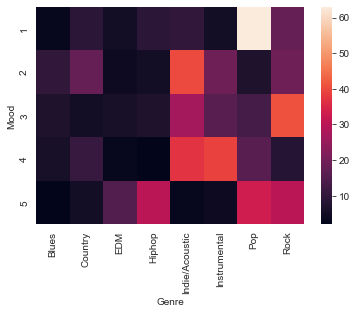

In [191]:
#Correlation between Mood and Genre
sns.heatmap(pd.crosstab(df['Mood'], df['Genre']))

<AxesSubplot:xlabel='Genre', ylabel='Age'>

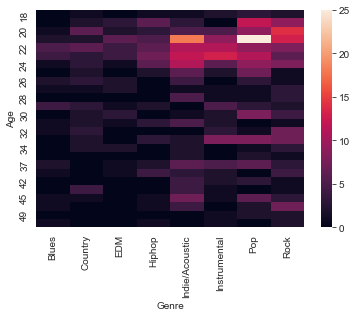

In [207]:
#Summary correlation between Age and Genre
sns.heatmap(pd.crosstab(df['Age'], df['Genre']))

<AxesSubplot:xlabel='Happy', ylabel='Age'>

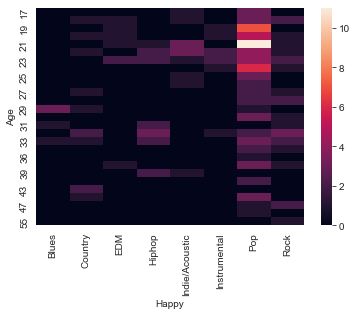

In [192]:
#Correlation between which Genre is preferred by age groups when Happy
sns.heatmap(pd.crosstab(data['Age'], data['Happy']))

<AxesSubplot:xlabel='Gloomy', ylabel='Age'>

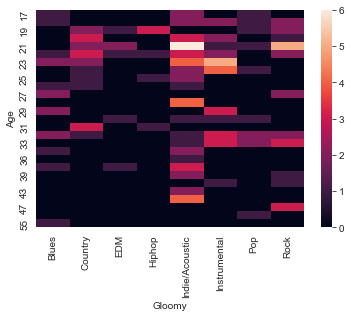

In [205]:
#Correlation between which Genre is preferred by age groups when Gloomy
sns.heatmap(pd.crosstab(data['Age'], data['Gloomy']))

<AxesSubplot:xlabel='Stressed', ylabel='Age'>

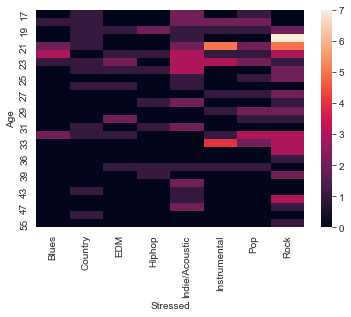

In [194]:
#Correlation between which Genre is preferred by age groups when Stressed
sns.heatmap(pd.crosstab(data['Age'], data['Stressed']))

<AxesSubplot:xlabel='Relaxing', ylabel='Age'>

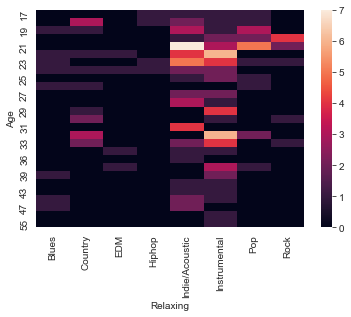

In [195]:
#Correlation between which Genre is preferred by age groups when Relaxing
sns.heatmap(pd.crosstab(data['Age'], data['Relaxing']))

<AxesSubplot:xlabel='Energetic', ylabel='Age'>

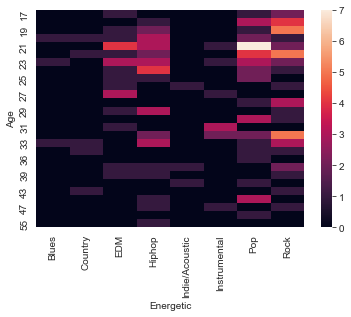

In [206]:
#Correlation between which Genre is preferred by age groups when Energetic
sns.heatmap(pd.crosstab(data['Age'], data['Energetic']))

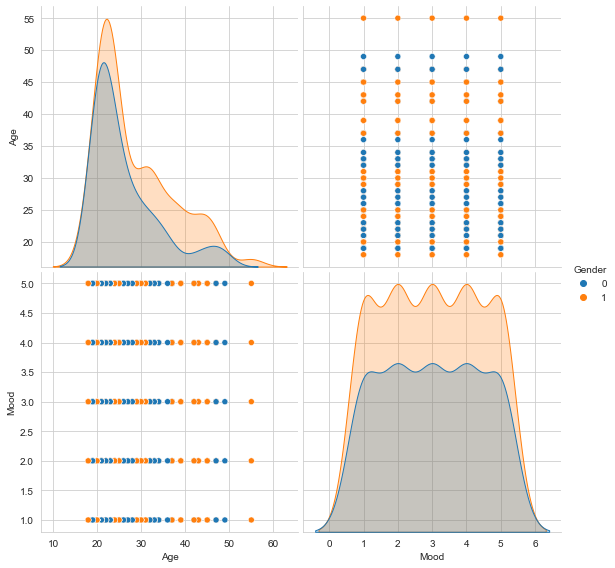

In [197]:
#Pairplot between all numerical categories
sns.set_style("whitegrid");
columns = ['Age','Gender','Mood']
sns.pairplot(df[columns], hue="Gender",height = 4 ,kind ='scatter',diag_kind='kde')
plt.show()

In [198]:
#Model testing
X=df[['Age','Gender','Mood']]
y=df['Genre']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size = 0.25, random_state = 1000)
model=DecisionTreeClassifier()
model=model.fit(X_train, y_train)

In [199]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

from joblib import dump, load
joblib.dump(model,'C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')

predictions=model.predict(X_test)

In [200]:
import pickle
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler
mdl = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
X= pd.read_csv('MRec.csv')
X_test = [[21,1,1],[22,0,4],[29,0,5],[31,0,4],[55,1,4]]
y_pred=mdl.predict(X_test)

val=pd.DataFrame(y_pred, columns=['Genre'])
val

,Genre
0,Pop
1,Indie/Acoustic
2,Hiphop
3,Country
4,Instrumental


In [201]:
#Load saved model
lr = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
#with open('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.sav' , 'rb') as f:
#    lr = pickle.load(f)
X=[[21,1,1],[22,0,4],[29,0,5],[31,0,4],[55,1,4]]
lr.predict(X)

array(['Pop', 'Indie/Acoustic', 'Hiphop', 'Country', 'Instrumental'],
      dtype=object)

<AxesSubplot:>

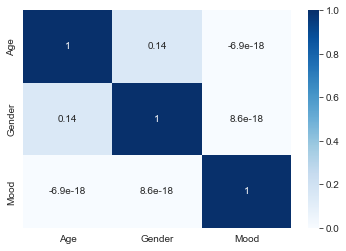

In [202]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [203]:
#Outliers
#q1=df.quantile(0.25)
#q3=df.quantile(0.75)
#iqr=q3-q1

#print(   (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))  )

#y_pred = model.predict(X_test)
#print("accuracy_score: %.2f" % accuracy_score(y_test, y_pred))